In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f_results = np.load("sim_results/f_results_ini_slope.npy")
print(f_results.shape)
# rates, species, d2q9_components, nx, ny
thickness_history = np.load("sim_results/thickness_history_ini_slope.npy")
print(thickness_history.shape)
# rates, history_points, nx

f_results_ns= np.load("sim_results/f_results_no_slope.npy")
thickness_history_ns = np.load("sim_results/thickness_history_no_slope.npy")

f_result_2x = np.load("sim_results/f_results_2x.npy")
thickness_history_2x = np.load("sim_results/thickness_history_2x.npy")

thickness_diffusion = np.load("sim_results/thickness_diffusion.npy")
print(thickness_diffusion.shape)

absorption_rates = np.linspace(5, 150, num = thickness_history.shape[0], endpoint = True)

(10, 2, 9, 400, 200)
(10, 31, 400)
(10, 400)


In [4]:
nx = thickness_history.shape[2]
non_absorb_mask = np.zeros(nx, dtype=bool)
gap = 32
width = 40
non_absorb_mask[nx//2 - gap//2 - width: nx//2- gap//2] = True
non_absorb_mask[nx//2 + gap//2 : nx//2 + gap//2 + width] = True

initialized with slope

85.55555555555556


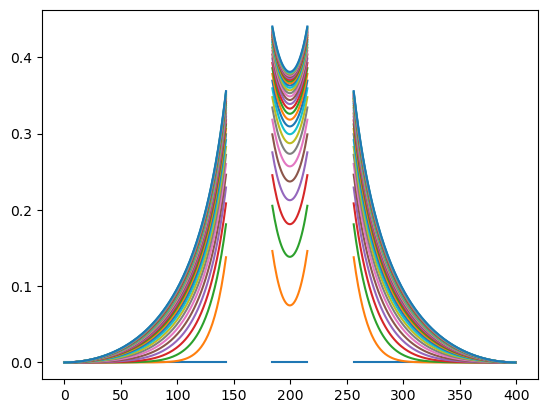

In [5]:
print(absorption_rates[5])
for i in range(thickness_history.shape[1]):
    thickness = thickness_history[5, i, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)

initialized without slope

85.55555555555556


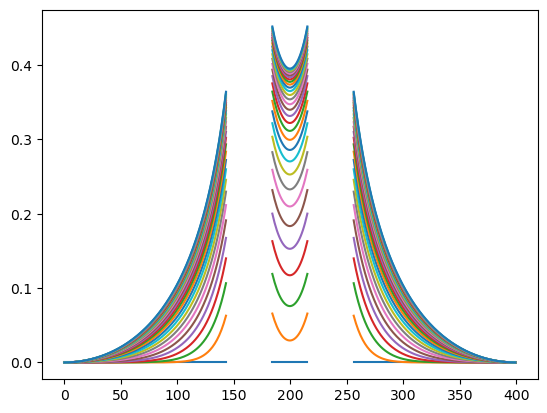

In [6]:
print(absorption_rates[5])
for i in range(thickness_history.shape[1]):
    thickness = thickness_history_ns[5, i, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)

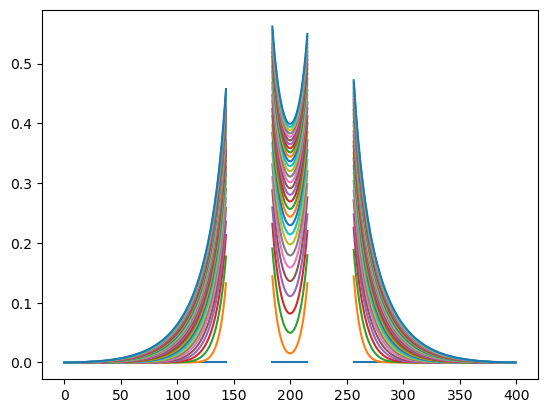

In [11]:
for i in range(thickness_history.shape[1]):
    thickness = thickness_history_2x[5, i, :][::2].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)

In [7]:
normalized_thickness_diffusion = []
for i in range(10):
    background_value = np.min(thickness_diffusion[i])
    extra_thickness = thickness_diffusion[i] - background_value #+ 1e-6
    normalized_thickness = extra_thickness/ background_value
    normalized_thickness_diffusion.append(normalized_thickness)

    slope = thickness_diffusion[i][1]-thickness_diffusion[i][0]
    measured_absorption = slope/thickness_diffusion[i][0]

normalized_thickness_diffusion = np.abs(normalized_thickness_diffusion)


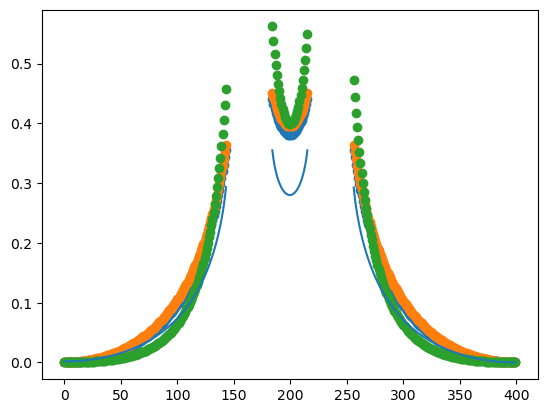

In [12]:
#LBM:
thickness = thickness_history[5, -1, :].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

thickness = thickness_history_ns[5, -1, :].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

thickness = thickness_history_2x[5, -1, :][::2].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

'''
for i in range(thickness_history.shape[0]):
    thickness = normalized_thickness_diffusion[i].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)
'''
thickness = normalized_thickness_diffusion[5].copy()
thickness[non_absorb_mask==1] = np.nan
plt.plot(np.arange(nx), thickness)



(0.0, 1.0)

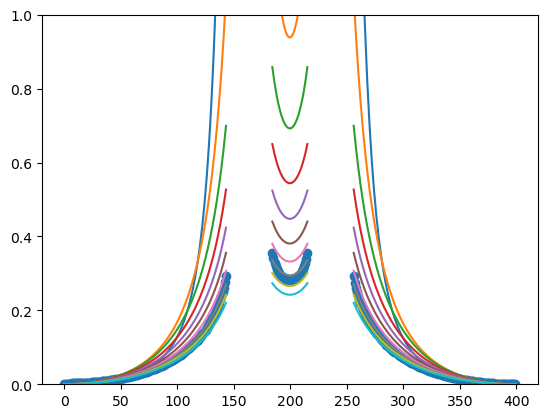

In [51]:
thickness = normalized_thickness_diffusion[5].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

for i in range(thickness_history.shape[0]):
    thickness = thickness_history[i, -1, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)

plt.ylim([0,1])

(0.0, 1.0)

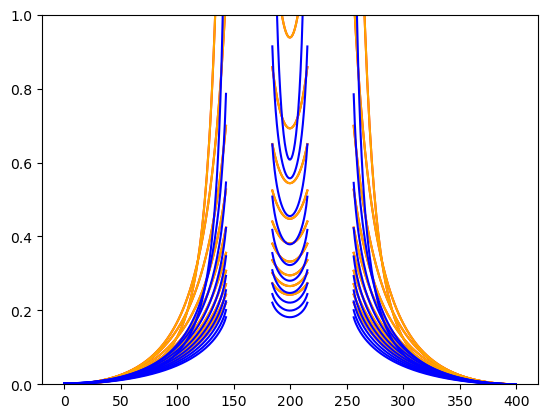

In [56]:
for i in range(thickness_history.shape[0]):
    thickness = thickness_history[i, -1, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, color = 'r')

for i in range(thickness_history.shape[0]):
    thickness = thickness_history[i, -1, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, color = 'orange')

for i in range(thickness_history.shape[0]):
    thickness = normalized_thickness_diffusion[i].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, color = 'b')

plt.ylim([0,1])